**This notebook shows how to access/view training set stored in the database (zarr files).**

In [1]:
# if zarr not installed run below:
!pip install zarr

In [2]:
import pandas as pd
import numpy as np
import zarr
from utils import *
pd.set_option('display.max_columns', 999)

from matplotlib import pyplot as plt
%matplotlib inline

## QSO

### Note:
This QSO catalog uses data from two different source. The [S82 variables catalog](http://faculty.washington.edu/ivezic/sdss/catalogs/S82variables.html)(S1) and the [S82 QSO catalog](http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html)(S2). Since S2 is based on SDSS DR7, newly confirmed QSOs in the S82 area (after DR7) were not included. Thus we begin with S2 and add in new QSOs that have matching light curve in S1. 

QSOs from S2 have no color info, we computed the colors from best-fit PSF magnitudes after correcting for galactic extinction (using u band extinction and extinction mapping between different bands, see S2 website for more info). The S1 catalog provides ISM corrected colors, and we just use them as given. Further effort will be taken to collect magnitudes and colors from one single source, for example, the SDSS archival database. In addition, all magnitudes in light curves are not corrected for extinction.

**Missing data is masked by value -999.0**   
We will change -999.0 to NaN in future versions. At this moment if you want to use Pandas to handle missing values (for example, `df.fillna()`), you can use `df = df.replace(-999.0, np.nan)`. See cells below from demonstration.

#### Check out qso master catalog

In [3]:
qso_df = get_qso_cat()
qso_df.head()

,RA_sdss,DEC_sdss,Z,Z_ERR,SpecQ,Var_LC,good_z,ID_sdss,RA_sp,DEC_sp,SPIES_ID,FLUX_AUTO_ch1,FLUXERR_AUTO_ch1,FLUX_AUTO_ch2,FLUXERR_AUTO_ch2,CLASS_STAR_ch1,CLASS_STAR_ch2,sdss2spies,sdss2gaia,gaia_id,pmra,pmra_error,pmdec,pmdec_error,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl
0,2.169302,1.238649,1.0733,0.0017,7,0,1,70,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000028,2546563316130849792,-999.000000,-999.000000,-999.000000,-999.000000,20.135056,0.293376,0.248568,0.142036,0.026312,60,0.379,60,0.409,59,0.414
1,1.091028,0.962126,0.7926,0.0007,7,0,1,98,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000030,2738365148137353216,1.004082,1.614945,0.956702,1.407345,19.751278,0.558688,0.297034,0.007393,0.366406,52,0.631,52,0.485,52,0.622
2,0.331289,0.177230,1.6272,0.0010,7,0,1,233,0.331286,0.177285,2884122,72.564163,3.060907,111.128793,2.868124,0.903601,0.601162,0.199564,0.000015,2546044793319356928,-0.694489,1.749273,0.089514,0.956225,20.348764,0.297344,0.091892,0.212134,0.081828,54,0.383,57,0.345,55,0.301
3,1.364696,-0.098956,0.6128,0.0004,7,0,1,1018,1.364689,-0.098837,2945300,245.583589,3.581048,294.436805,3.686833,0.930625,0.901671,0.429950,0.000028,2545799327348537856,0.525918,1.243956,-0.137775,0.661526,19.688948,0.329008,-0.097956,0.276038,-0.077004,60,0.670,62,0.627,59,0.537
4,0.221552,-0.292485,2.7657,0.0007,7,0,1,1310,0.221531,-0.292489,2802181,50.534418,2.711768,66.482977,2.630271,0.834730,0.832312,0.075603,0.000002,2449935519862437888,-2.927828,1.628008,-0.611706,0.715909,19.517084,0.998064,0.017852,-0.117446,0.155468,56,0.171,56,0.152,55,0.268


In [4]:
# update all missing values with na.nan
qso_df.iloc[:10].replace(-999.0, np.nan)

,RA_sdss,DEC_sdss,Z,Z_ERR,SpecQ,Var_LC,good_z,ID_sdss,RA_sp,DEC_sp,SPIES_ID,FLUX_AUTO_ch1,FLUXERR_AUTO_ch1,FLUX_AUTO_ch2,FLUXERR_AUTO_ch2,CLASS_STAR_ch1,CLASS_STAR_ch2,sdss2spies,sdss2gaia,gaia_id,pmra,pmra_error,pmdec,pmdec_error,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl
0,2.169302,1.238649,1.0733,0.0017,7,0,1,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000028,2546563316130849792,NaN,NaN,NaN,NaN,20.135056,0.293376,0.248568,0.142036,0.026312,60,0.379,60,0.409,59,0.414
1,1.091028,0.962126,0.7926,0.0007,7,0,1,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000030,2738365148137353216,1.004082,1.614945,0.956702,1.407345,19.751278,0.558688,0.297034,0.007393,0.366406,52,0.631,52,0.485,52,0.622
2,0.331289,0.177230,1.6272,0.0010,7,0,1,233,0.331286,0.177285,2884122.0,72.564163,3.060907,111.128793,2.868124,0.903601,0.601162,0.199564,0.000015,2546044793319356928,-0.694489,1.749273,0.089514,0.956225,20.348764,0.297344,0.091892,0.212134,0.081828,54,0.383,57,0.345,55,0.301
3,1.364696,-0.098956,0.6128,0.0004,7,0,1,1018,1.364689,-0.098837,2945300.0,245.583589,3.581048,294.436805,3.686833,0.930625,0.901671,0.429950,0.000028,2545799327348537856,0.525918,1.243956,-0.137775,0.661526,19.688948,0.329008,-0.097956,0.276038,-0.077004,60,0.670,62,0.627,59,0.537
4,0.221552,-0.292485,2.7657,0.0007,7,0,1,1310,0.221531,-0.292489,2802181.0,50.534418,2.711768,66.482977,2.630271,0.834730,0.832312,0.075603,0.000002,2449935519862437888,-2.927828,1.628008,-0.611706,0.715909,19.517084,0.998064,0.017852,-0.117446,0.155468,56,0.171,56,0.152,55,0.268
5,0.281370,0.686984,1.4040,0.0006,7,0,1,1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000020,2738254578499203072,0.932784,1.152660,0.053690,0.470493,19.740774,0.071304,0.261922,0.131069,-0.099402,61,0.560,63,0.383,62,0.410
6,2.607954,0.913245,2.8599,0.0003,7,0,1,1540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000023,2546351179110292480,-0.415243,0.970336,0.273474,0.530502,19.027852,2.163792,0.032356,0.133262,0.171604,56,0.219,52,0.241,56,0.246
7,1.669492,0.643952,1.3412,0.0007,7,0,1,1580,1.669453,0.643988,3015435.0,76.855918,2.702290,123.383143,2.999063,0.962292,0.895636,0.191433,0.000009,2546138939002105856,0.049229,1.857050,-1.504629,1.709128,20.019462,0.105352,0.400186,0.024297,-0.176426,60,0.625,61,0.382,61,0.513
8,4.850273,-0.276395,1.7664,0.0007,7,0,1,2113,4.850281,-0.276320,3264325.0,58.472900,3.082231,82.357364,2.307107,0.101202,0.836486,0.272710,0.000026,2545258951742668288,0.800211,1.770372,-1.691213,1.089454,20.073502,-0.148808,-0.115694,0.247037,0.250654,51,0.548,51,0.616,55,0.448
9,4.026021,0.478127,1.8779,0.0021,7,0,1,2306,4.025965,0.478189,3316994.0,43.526021,2.850441,68.566989,2.435506,0.410248,0.856325,0.301104,0.000003,2545598391598489600,NaN,NaN,NaN,NaN,20.530648,0.030208,0.083144,0.320488,0.045896,52,0.613,53,0.510,53,0.536


#### Show column definitions

In [11]:
qso_cat_meta()

{'CLASS_STAR_ch1': '3.6 micrometer morphology classification, > 0.5 for resolved source',
 'CLASS_STAR_ch2': '4.5 micrometer morphology classification, > 0.5 for resolved source',
 'DEC_sdss': 'DEC from SDSS in degrees (J2000)',
 'DEC_sp': 'DEC from SpIES in degrees (J2000)',
 'FLUXERR_AUTO_ch1': '3.6 micrometer flux error given by SExtractor',
 'FLUXERR_AUTO_ch2': '4.5 micrometer flux error given by SExtractor',
 'FLUX_AUTO_ch1': '3.6 micrometer flux value automatically extracted using SExtractor',
 'FLUX_AUTO_ch2': '4.5 micrometer flux value automatically extracted using SExtractor',
 'ID_sdss': 'Unique ID for both QSO and variable stars',
 'RA_sdss': 'RA from SDSS in degrees (J2000)',
 'RA_sp': 'RA from THE SPITZER IRAC EQUATORIAL SURVEY (SpIES) in degrees (J2000)',
 'SPIES_ID': 'Unique ID assigned to each source in SpIES',
 'SpecQ': 'Source of spectrum, 7 for SDSS DR7 and 14 for SDSS DR14',
 'Var_LC': '1 for light curve of corresponding object comes from Ivezic s82 variables catalo

#### Get/Plot light curves
- To retrieve the light curve for any object, use functions ``get_sdss_qso()`` or `get_crts_qso()` while providing `ID_sdss` as the only input.    
- To plot the light curves, use functions `plot_qso()`, `plot_sdss_qso()` for original data, or use functions `plot_merge_gri()` and `plot_sdss_crts()` for merged light curves normalized by mean or median of each band. 

To see what arguments can be passed to each function, use the help method, `help(plot_qso)` for example.  

In [12]:
help(plot_sdss_qso)

Help on function plot_sdss_qso in module utils:

plot_sdss_qso(ID_sdss, bands=['u', 'g', 'r', 'i', 'z'])
    Plot SDSS quasar light curves without merging.
    
    Args:
        ID_sdss: Unique ID for an object in training sample.
        bands (list): A list specifying light curves in which bands to plot.



**Currently, we only normalize and merge light curve by subtracting the mean or median (can be specified while calling the plot function). Certainly, more sphoiscated light curve merging methods should be implemented, for example, [CREAM](https://academic.oup.com/mnras/article/456/2/1960/1066664), but computing cost should also be considered. For now, this should be okay to get started. Any comments/suggestions for better light curve merging methods are welcome.**

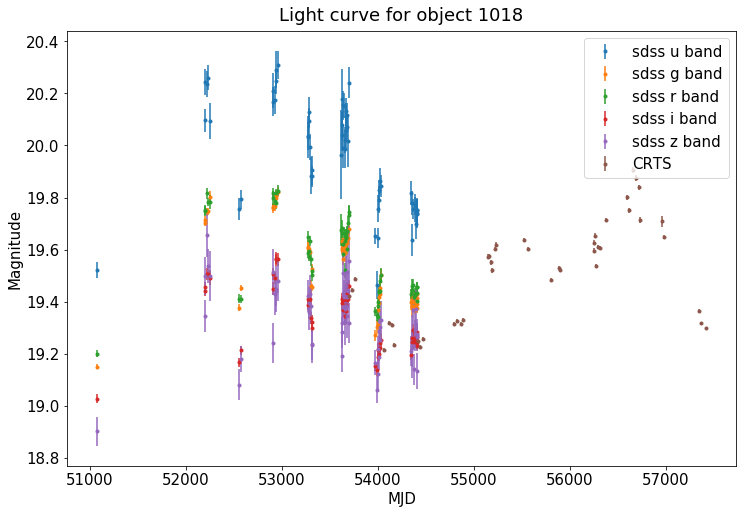

In [11]:
# plot all data
plot_qso(1018)

In [ ]:
# an invalid id will raise an Exception
plot_qso(1)

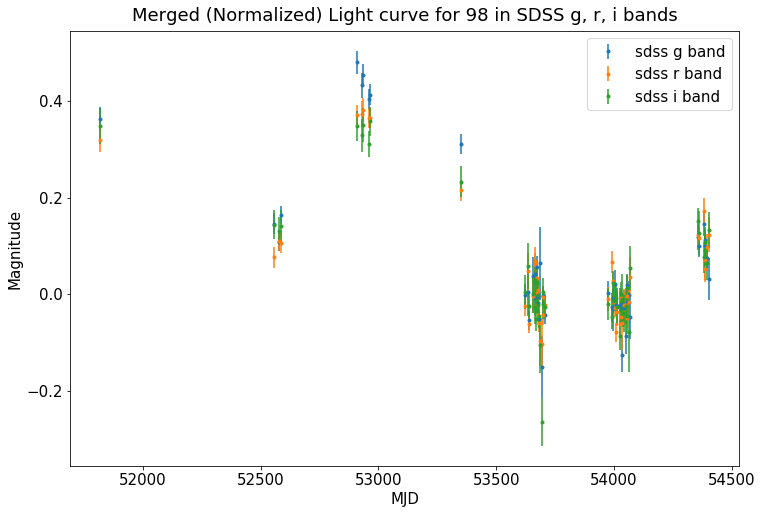

In [10]:
# merged lc using sdss g, r, i
plot_merge_gri(98)

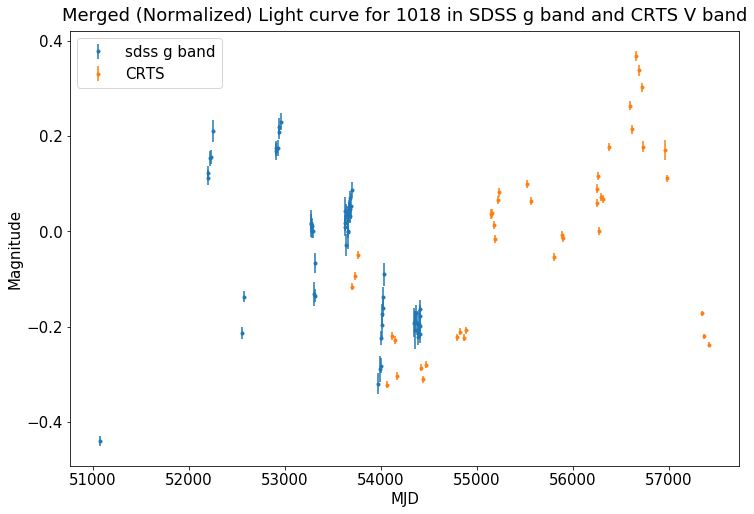

In [11]:
# sdss g band merged with CRTS
plot_sdss_crts(1018, sdss_band='g')

---
## Non-AGN variables

### Note:
The non-AGN variables catalog consists of all objects in S2 except those have been identified as AGN using spectrum. Thus we are **NOT** confident that all sources in this catalog are non-AGN. This catalog could contains AGNs that were missed by target selection algorithms at the first place. Also no CRTS light curves are avaiable for objects in this catalog.

**Missing data is masked by value -999.0**  
Similiar approach as done for the AGN catalog can be taken to replace -999.0 with NaN.

#### Check out master catalog

In [5]:
vstar_df = get_var_cat()
vstar_df.head()

,ID_sdss,RA_sdss,DEC_sdss,P,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl,RA_sp,DEC_sp,SPIES_ID,FLUX_AUTO_ch1,FLUXERR_AUTO_ch1,FLUX_AUTO_ch2,FLUXERR_AUTO_ch2,CLASS_STAR_ch1,CLASS_STAR_ch2,sdss2spies,sdss2gaia,gaia_id,pmra,pmra_error,pmdec,pmdec_error
0,74,2.714809,0.963019,1.483646,19.75,0.89,0.22,0.05,0.00,43,0.248,43,0.213,44,0.276,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000027,2546353103253723136,0.161619,1.966663,-6.564630,0.950373
1,429,1.145510,-0.887604,1.483646,17.93,2.43,1.35,0.77,0.45,12,0.276,12,0.292,12,0.377,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000025,2545683333166174720,13.324682,0.567646,-16.236439,0.230887
2,551,2.315915,0.587049,1.483646,17.20,2.27,0.98,0.35,0.20,53,0.096,56,0.041,52,0.043,2.315877,0.587073,3085374,312.987570,3.372453,195.159140,3.132563,0.979983,0.971256,0.163383,0.000042,2546314177963575296,-0.503402,0.280889,-10.100079,0.187837
3,1606,3.407860,-0.997584,1.483646,16.43,2.70,1.51,0.53,0.25,55,1.108,59,0.589,58,0.483,3.408010,-0.997265,3175043,2862.642698,6.664594,1880.124033,6.326755,0.985872,0.332965,1.269538,0.000045,2544786505341029888,-3.523551,0.260941,-2.339212,0.129662
4,1904,1.058646,0.508339,1.483646,16.62,1.25,0.33,0.15,0.00,51,0.407,50,0.368,51,0.366,1.058563,0.508503,2950195,466.359499,3.734706,302.442629,3.741615,0.034615,0.031839,0.661916,0.000037,2546159387342412288,8.973232,0.204390,-3.067273,0.097541


#### Show column definitions

In [9]:
var_cat_meta()

{'CLASS_STAR_ch1': '3.6 micrometer morphology classification, > 0.5 for resolved source',
 'CLASS_STAR_ch2': '4.5 micrometer morphology classification, > 0.5 for resolved source',
 'DEC_sdss': 'DEC from SDSS in degrees (J2000)',
 'DEC_sp': 'DEC from SpIES in degrees (J2000)',
 'FLUXERR_AUTO_ch1': '3.6 micrometer flux error given by SExtractor',
 'FLUXERR_AUTO_ch2': '4.5 micrometer flux error given by SExtractor',
 'FLUX_AUTO_ch1': '3.6 micrometer flux value automatically extracted using SExtractor',
 'FLUX_AUTO_ch2': '4.5 micrometer flux value automatically extracted using SExtractor',
 'ID_sdss': 'Unique ID for both QSO and variable stars',
 'P': 'Period (days), see http://faculty.washington.edu/ivezic/sdss/catalogs/S82variables.html for more info',
 'RA_sdss': 'RA from SDSS in degrees (J2000)',
 'RA_sp': 'RA from THE SPITZER IRAC EQUATORIAL SURVEY (SpIES) in degrees (J2000)',
 'SPIES_ID': 'Unique ID assigned to each source in SpIES',
 'gAmpl': 'SDSS g band amplitude in the light curv

#### Get/Plot light curves
- To retrieve the light curves, use function `get_sdss_var()` with `ID_sdss` at the only input.  
- To plot the light curves, use function `plot_var()` or `plot_merge_gri()`.

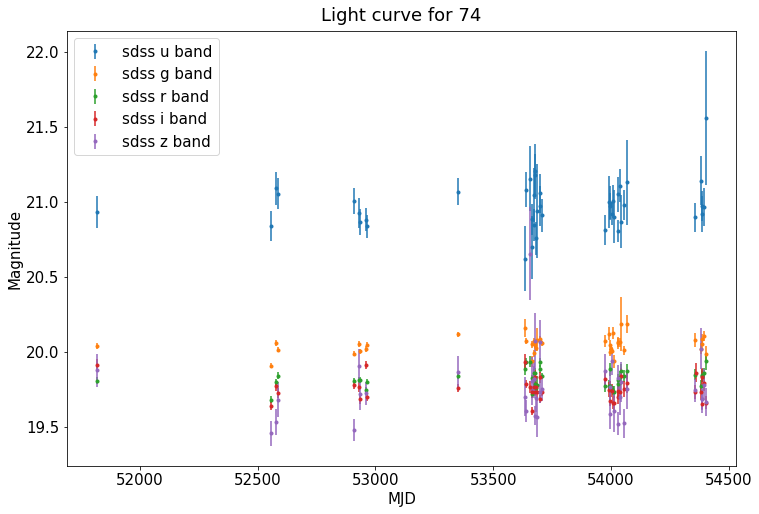

In [6]:
# plot var
plot_var(74)

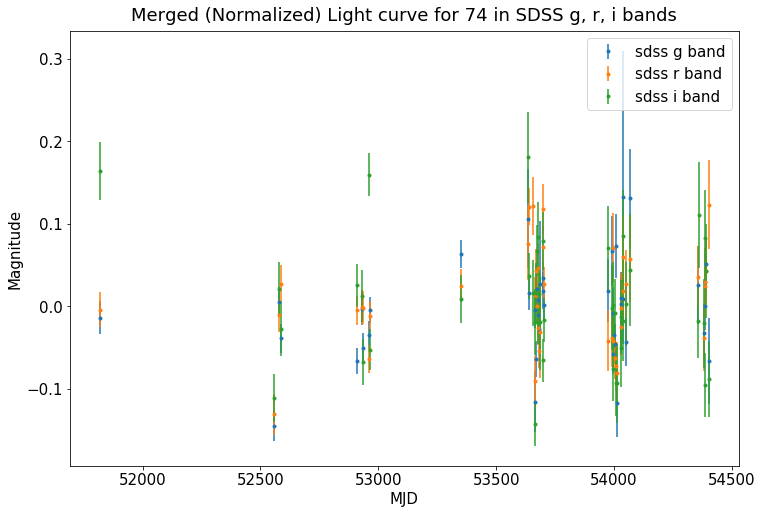

In [7]:
# plot gri merged light curve
plot_merge_gri(74)